# plt-mpl

In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

## Some "Black Magic" Tricks

In [2]:
plt.rcParams['font.size'] = 16

In [3]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(
    color=['deeppink', '#190dbf']
)

## Plots

In [4]:
x = np.linspace(0, 1, 10)
y = 2 * np.sin(x)

### One

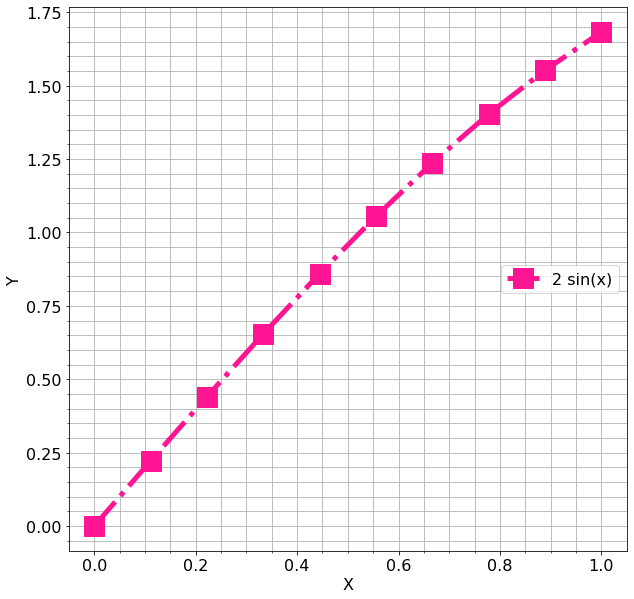

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(
    x, y, 
    linewidth=5,
    label='2 sin(x)',
    marker='s',
    markersize=20,
    linestyle='-.'
)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='center right')

plt.minorticks_on()
plt.grid(which='both', zorder=10)
# plt.axis('equal')

fig.savefig('plot.svg')

plt.show()

### Two

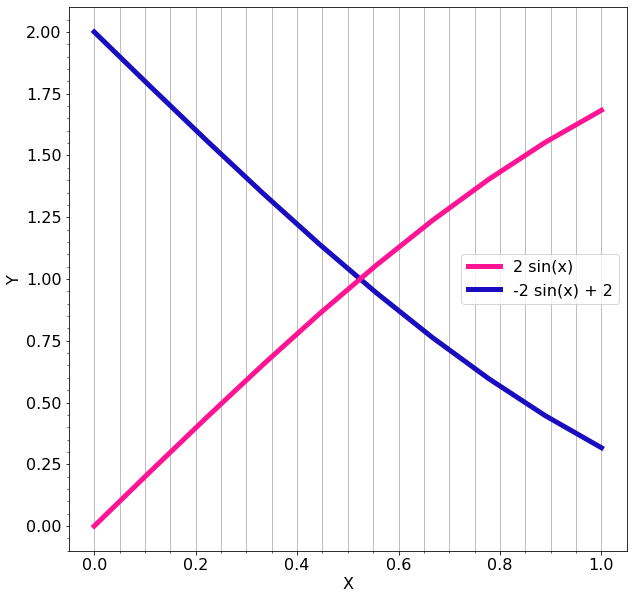

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(x, y, linewidth=5, label='2 sin(x)', zorder=10)
ax.plot(x, -y + 2, linewidth=5, label='-2 sin(x) + 2', zorder=5)

plt.xlabel('X')
plt.ylabel('Y')

plt.legend(loc='center right')

plt.minorticks_on()
plt.grid(which='both', axis='x', zorder=10)

plt.show()

### Many

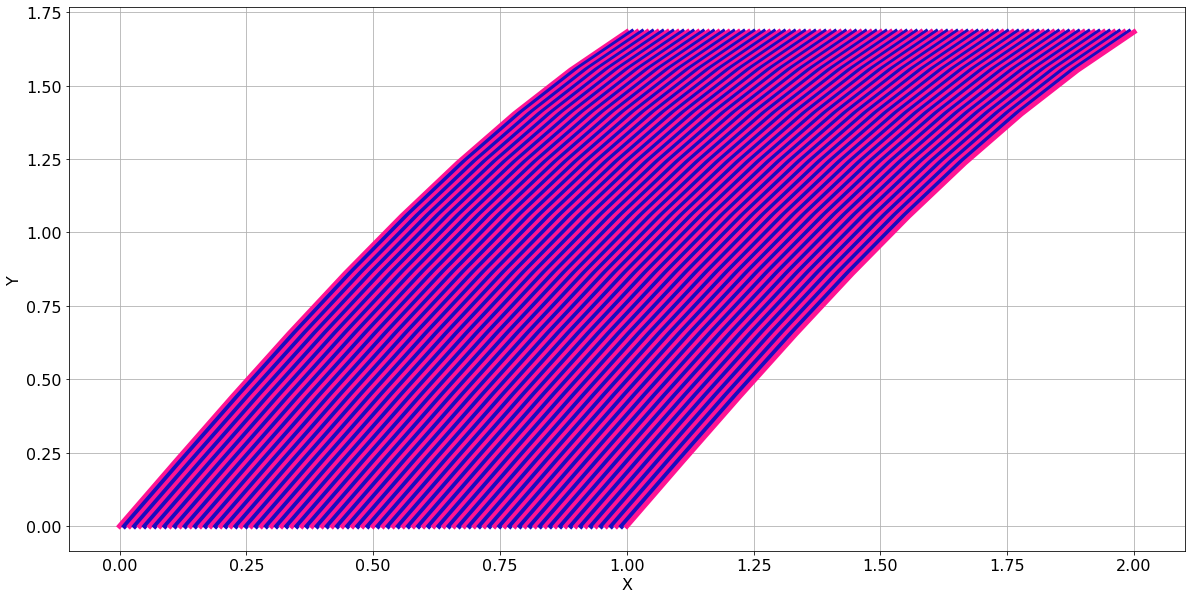

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))

for shift in np.arange(0, 101):
    plt.plot(x + shift/100, y, linewidth=5)

plt.xlabel('X')
plt.ylabel('Y')

plt.grid()

plt.show()

### Subplots

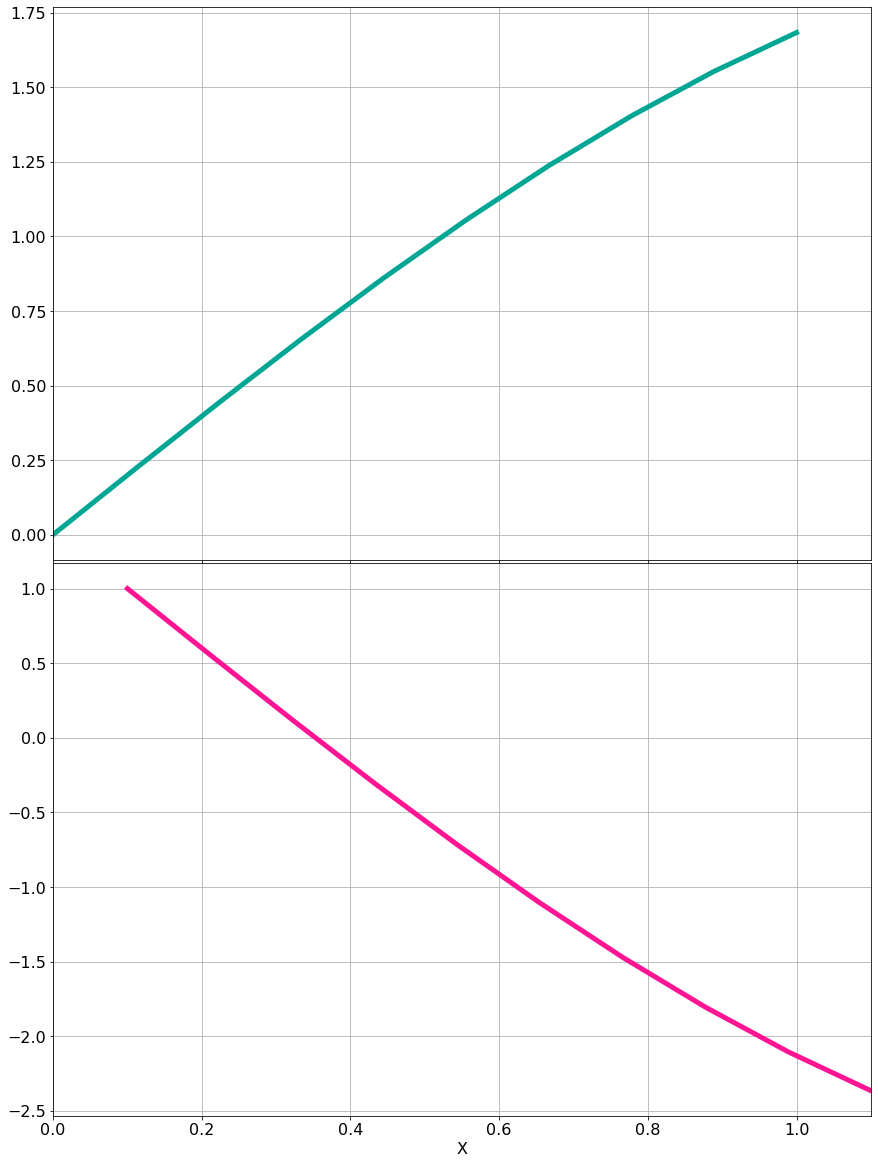

In [8]:
fig, axes = plt.subplots(
    nrows=2, ncols=1, figsize=(12, 8 * 2)
)

ax = axes[0]
ax.plot(
    x, y, linewidth=5, color=(0.0, 0.65, 0.58)
)
ax.set_xlim(0, 1.1)
ax.set_xticklabels([])
ax.grid()

ax = axes[1]
ax.plot(
    x + 0.1, -2 * y + 1, linewidth=5
)
ax.set_xlim(0, 1.1)
ax.set_xlabel('X')

plt.tight_layout(pad=0.01)
plt.grid()

plt.show()

### Twins

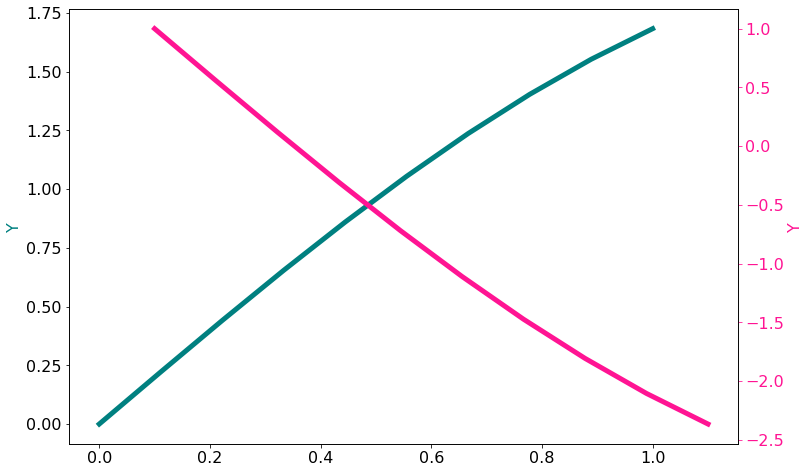

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(
    x, y, linewidth=5, color='teal'
)
ax.set_ylabel('Y', color='teal')

ax2 = ax.twinx()

ax2.plot(
    x + 0.1, -2 * y + 1, linewidth=5, color='deeppink'
)
ax2.set_ylabel('Y', color='deeppink')
ax2.tick_params(axis='y', colors='deeppink')

plt.show()

### Scatter

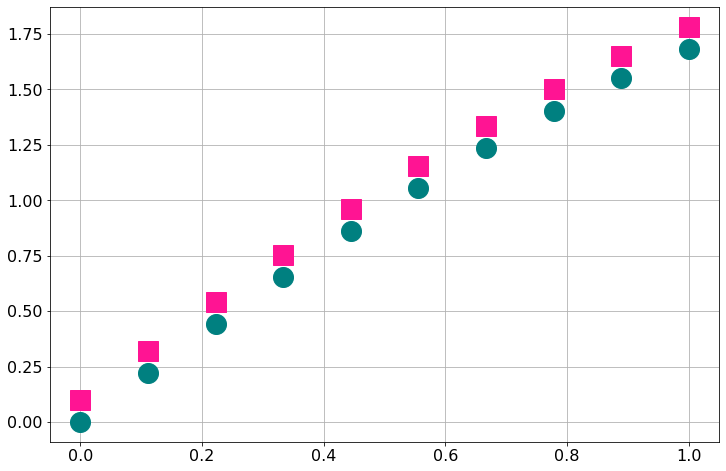

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(x, y, s=20*20, color='teal', zorder=10)
ax.plot(x, y + 0.1, lw=0, marker='s', markersize=20, color='deeppink')

plt.grid()
plt.show()

In [11]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html

from matplotlib import cm
from matplotlib.colors import ListedColormap

num_colors = 12
colormap = cm.get_cmap('spring', num_colors)

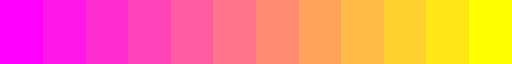

In [12]:
colormap

In [13]:
colormap(0.1), colormap(0.9)

((1.0, 0.09090909090909091, 0.9090909090909091, 1.0),
 (1.0, 0.9090909090909091, 0.09090909090909094, 1.0))

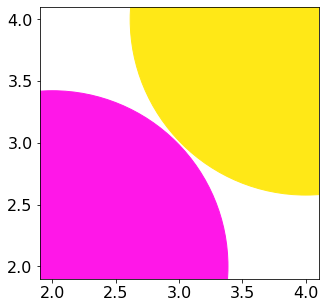

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.scatter([2], [2], s=123500, color=colormap(0.1))
plt.scatter([4], [4], s=123500, color=colormap(0.9))

plt.show()

In [15]:
custom_colormap = ListedColormap(
    ['lavenderblush', 'pink', 'lightcoral', 'indianred', 'firebrick', 'darkred']
)

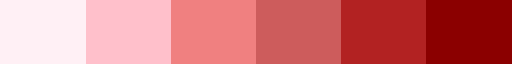

In [16]:
custom_colormap

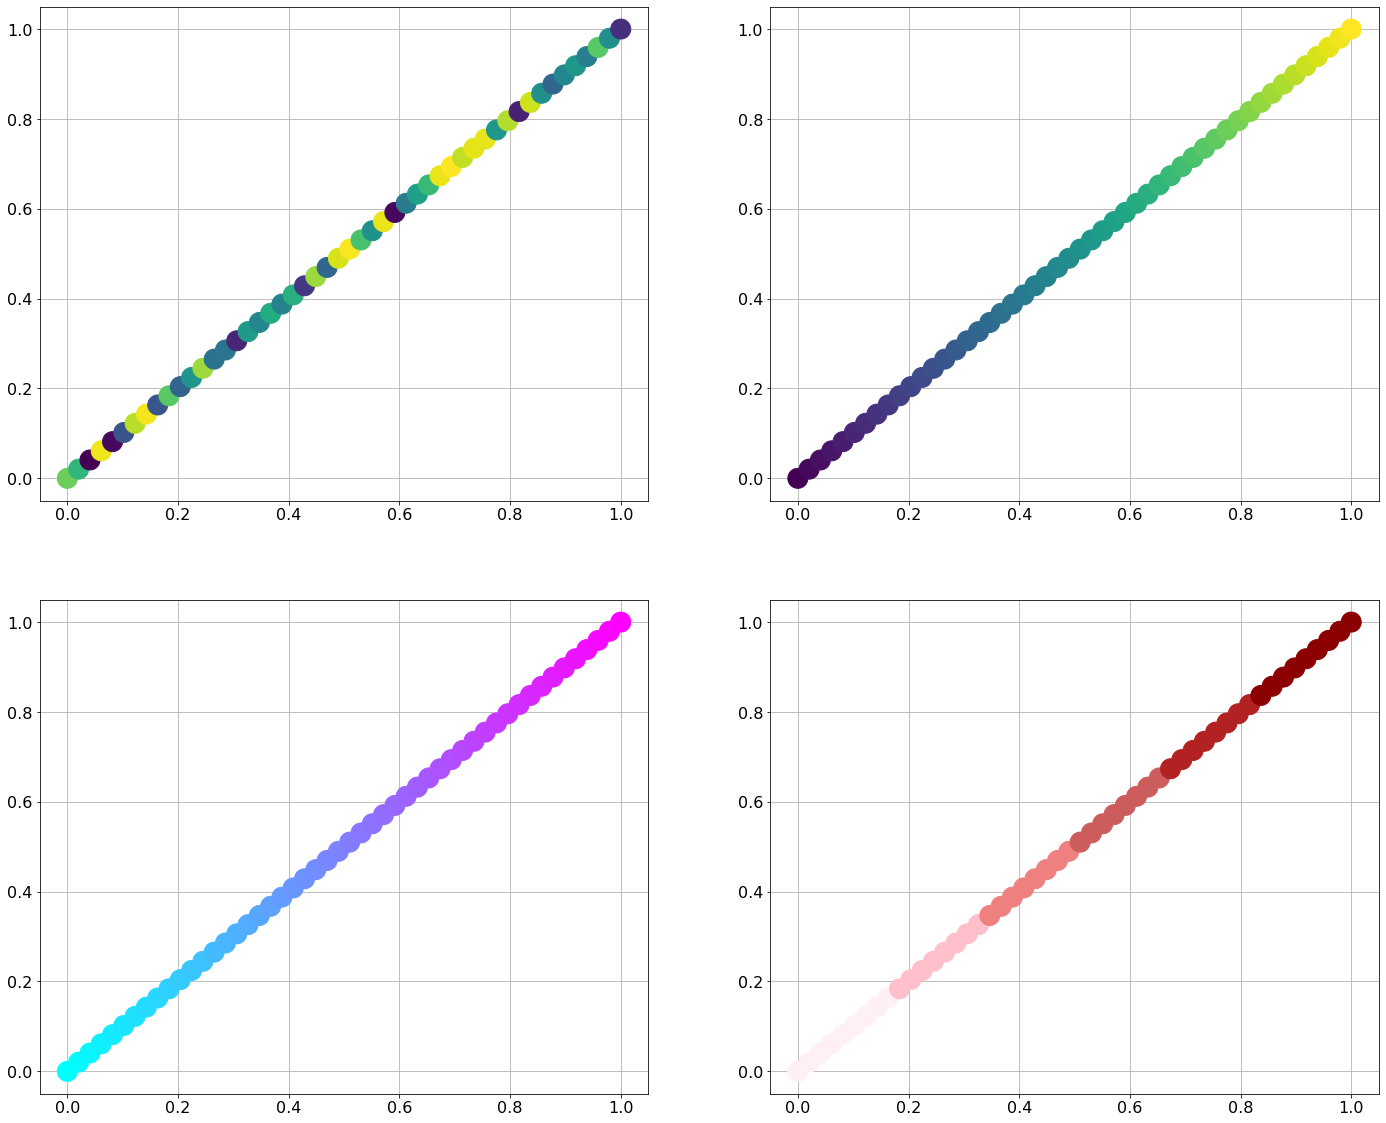

In [17]:
# https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python
# https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12 * 2, 10 * 2))

x = np.linspace(0, 1, 50)
c = np.random.rand(len(x))

axes[0, 0].scatter(x, x, c=c, s=400, zorder=10)
axes[0, 0].grid()

axes[0, 1].scatter(x, x, c=x, s=400, zorder=10)
axes[0, 1].grid()

axes[1, 0].scatter(x, x, c=x, s=400, zorder=10, cmap='cool')
axes[1, 0].grid()

axes[1, 1].scatter(x, x, c=x, s=400, zorder=10, cmap=custom_colormap)
axes[1, 1].grid()

plt.show()

https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python

### Vertical/Horizontal Lines

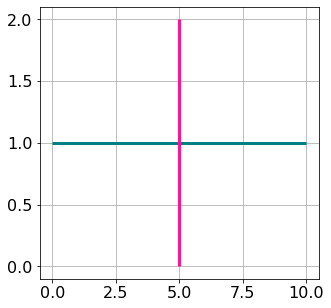

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.hlines(1, 0, 10, color='teal', lw=3)
plt.vlines(5, 0, 2, color='deeppink', lw=3)

plt.grid()

plt.show()

### Some Other Stuff

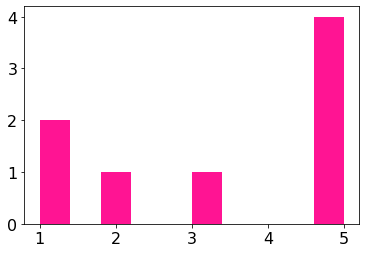

In [19]:
_ = plt.hist([1, 1, 2, 3, 5, 5, 5, 5])

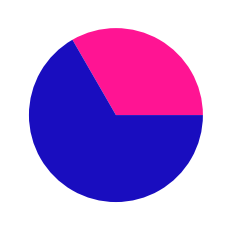

In [20]:
_ = plt.pie([1, 2])

## Matplotlib + Pandas

In [21]:
import os
import warnings

import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [22]:
# https://github.com/Yorko/mlcourse.ai/blob/main/data/beauty.csv

DATA_PATH = 'beauty.csv'

In [23]:
pd.read_csv(DATA_PATH, nrows=2, sep=';')

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3


In [24]:
df = pd.read_csv(DATA_PATH, sep=';')

df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


### Examples

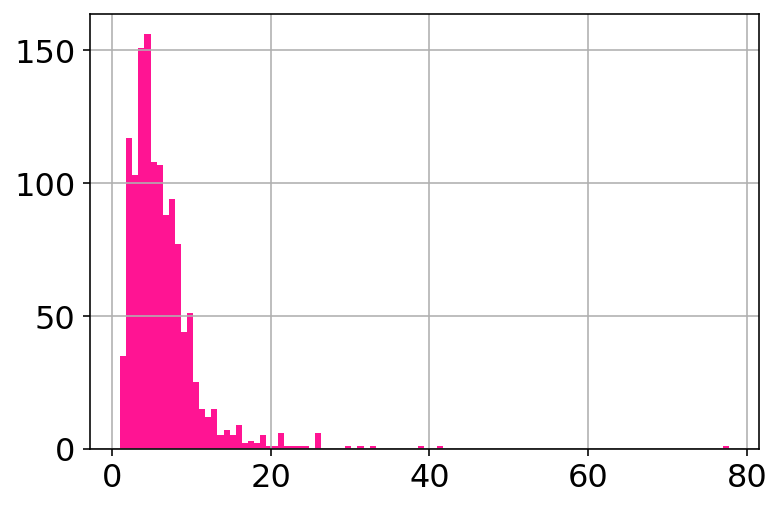

In [25]:
obj = df['wage'].hist(figsize=(6, 4), bins=100)

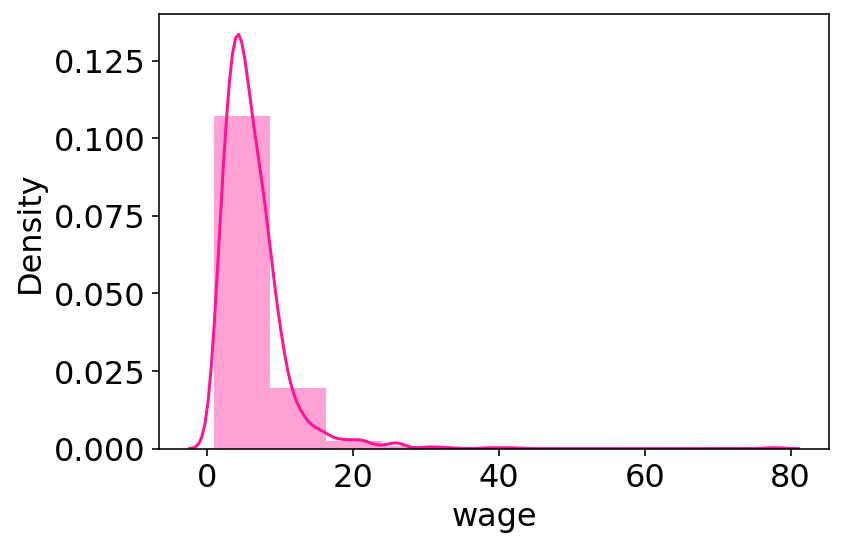

In [26]:
_ = sns.distplot(df['wage'], bins=10)

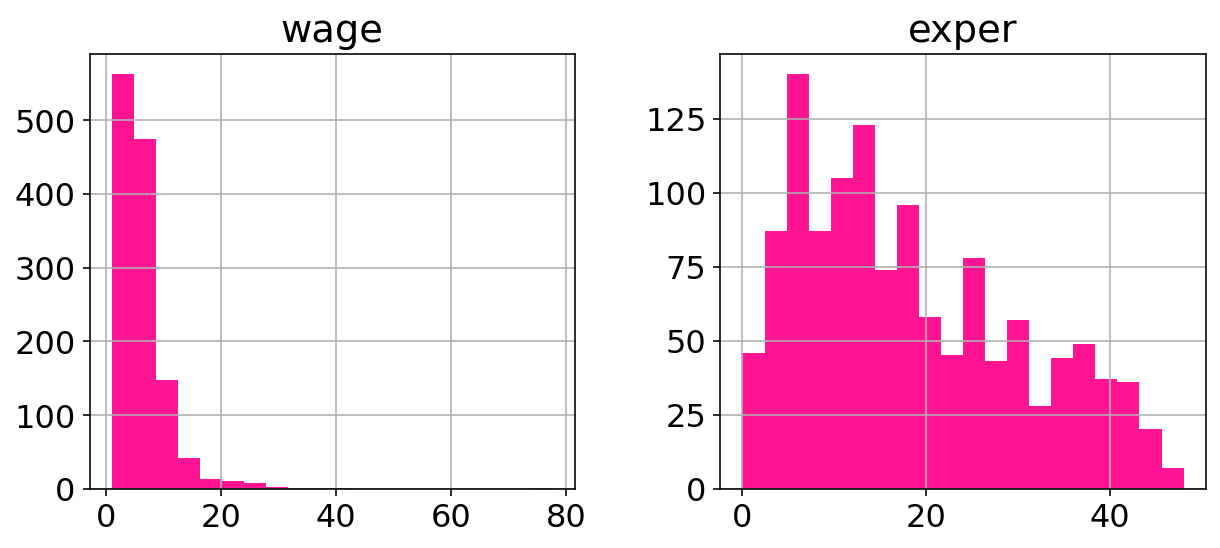

In [27]:
_ = df[['wage', 'exper']].hist(figsize=(10, 4), bins=20)

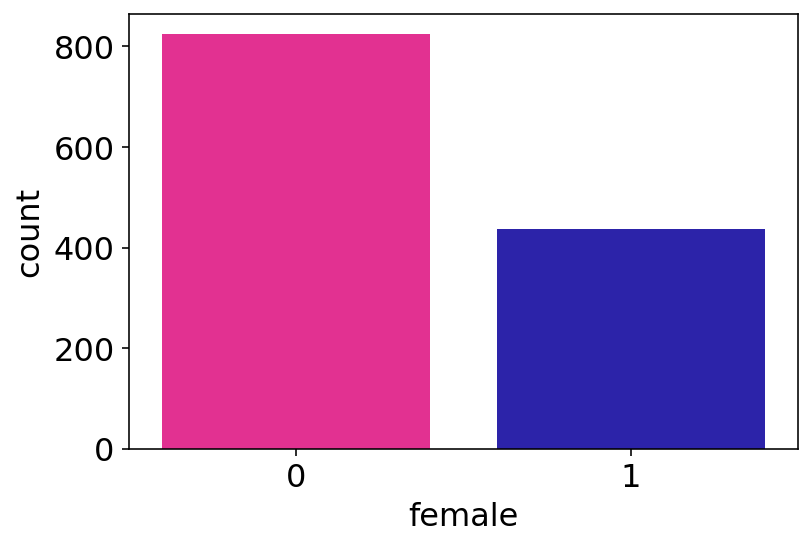

In [28]:
_ = sns.countplot(x='female', data=df)

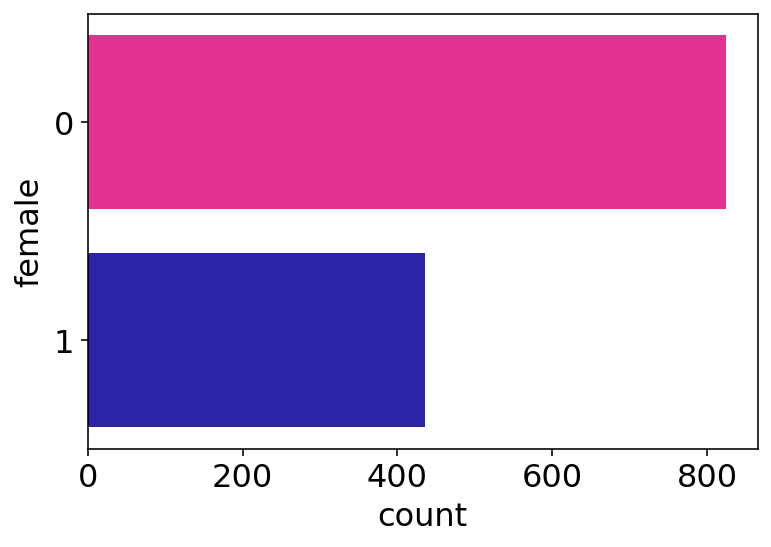

In [29]:
_ = sns.countplot(y='female', data=df)

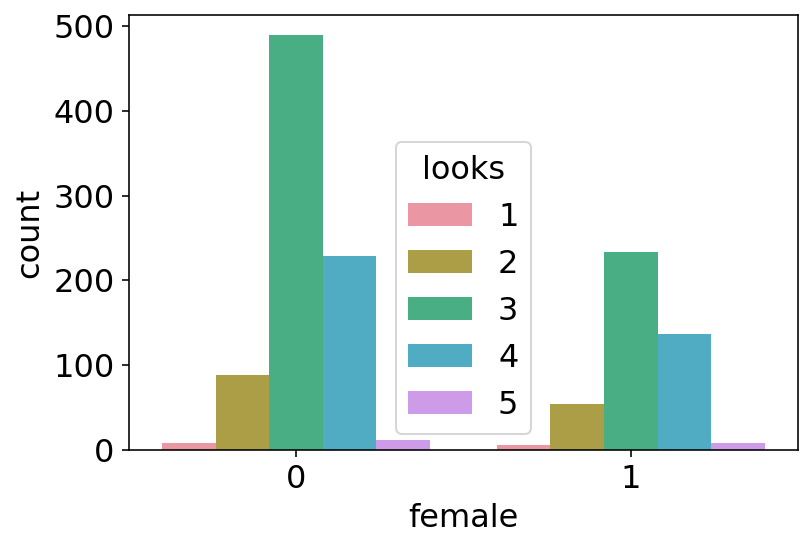

In [30]:
_ = sns.countplot(x='female', hue='looks', data=df)

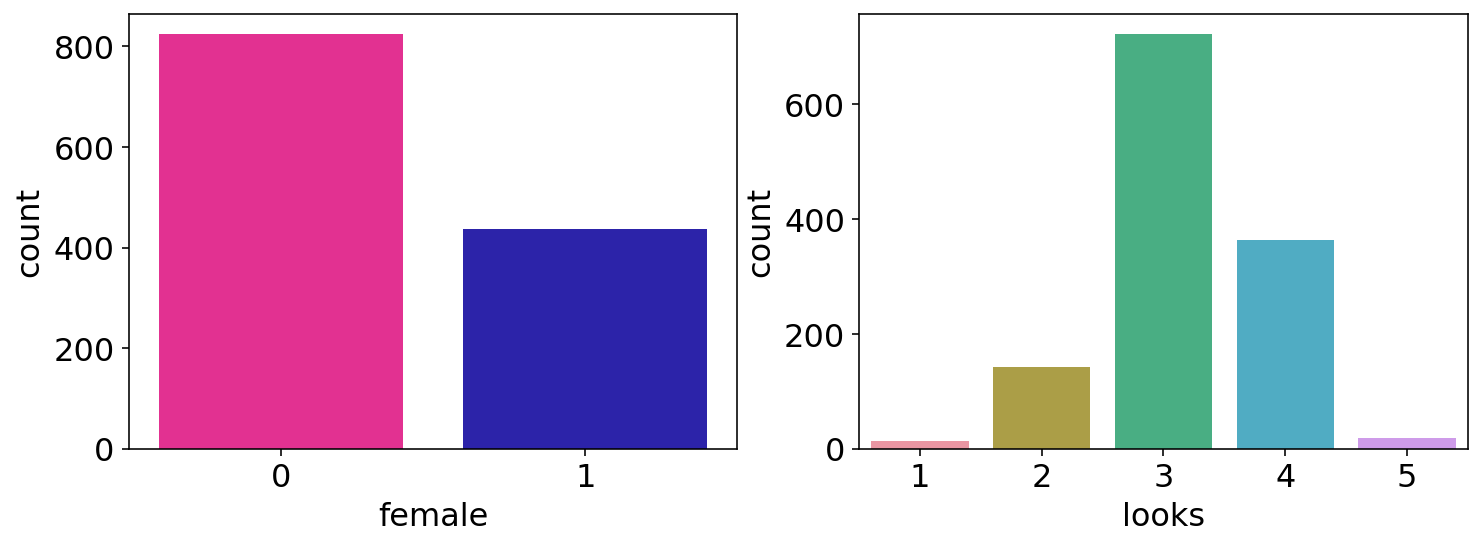

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='female', data=df, ax=axes[0])
sns.countplot(x='looks', data=df, ax=axes[1])

plt.show()

In [32]:
df.groupby('female')['wage'].count()

female
0    824
1    436
Name: wage, dtype: int64

In [33]:
type(df.groupby('female')['wage'].count())

pandas.core.series.Series

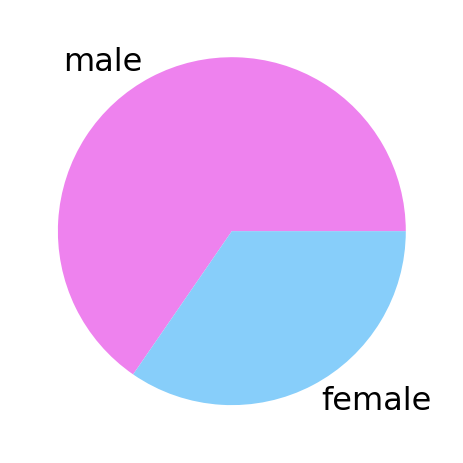

In [34]:
female_counts = df.groupby('female')['wage'].count()

labels = {0: 'male', 1: 'female'}
colors = {0: 'violet', 1: 'lightskyblue'}

_ = plt.pie(
    female_counts,
    labels=[labels[i] for i in female_counts.index],
    colors=[colors[i] for i in female_counts.index]
)

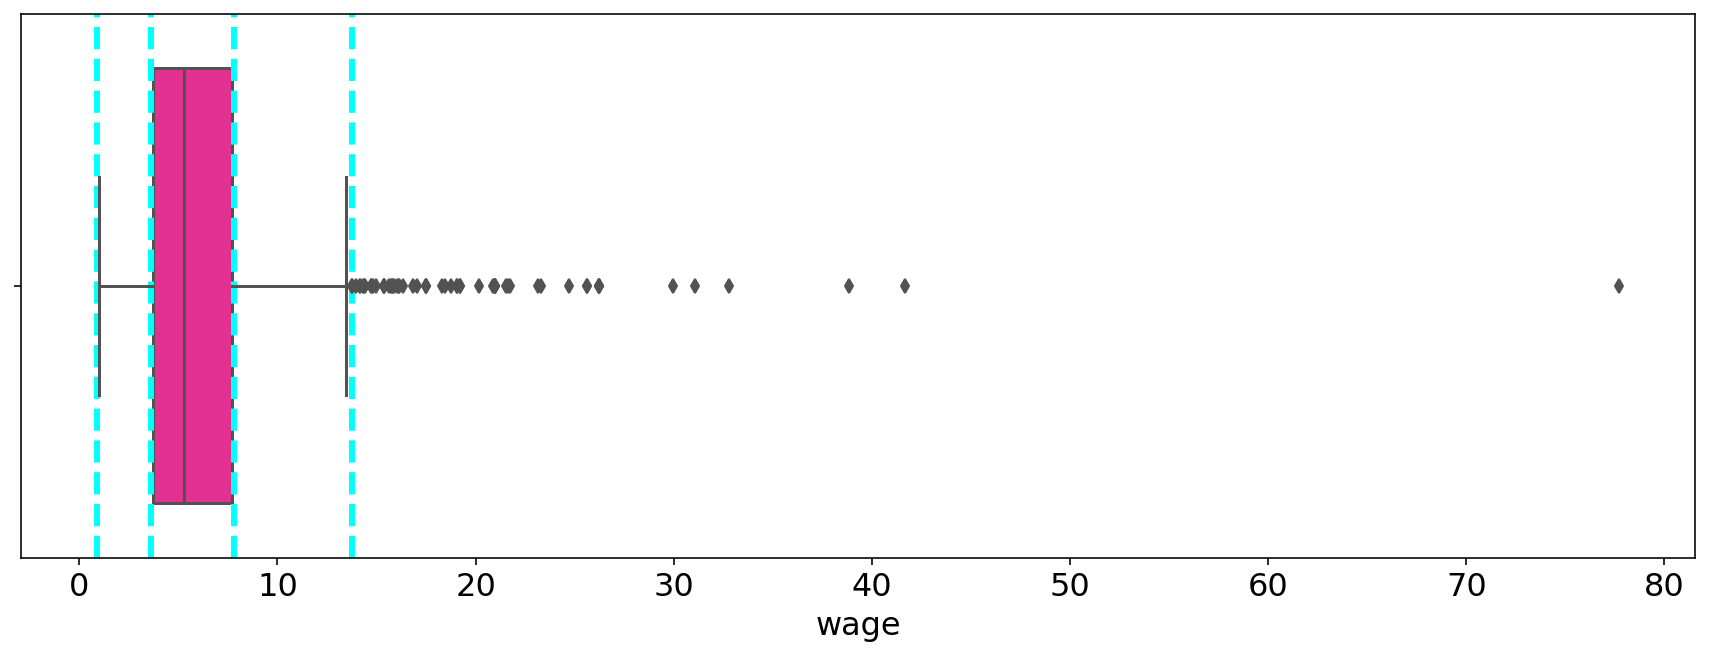

In [35]:
_ = plt.subplots(figsize=(15, 5))

ax = sns.boxplot(x='wage', data=df)

wages = df['wage']

q25 = wages.quantile(0.25)
q75 = wages.quantile(0.75)
iqr = q75 - q25
min_value = max(q25 - 1.5 * iqr, min(wages))
max_value = min(q75 + 1.5 * iqr, max(wages))

tiny = 0.1
line_params = dict(ymin=0.5, ymax=-0.5, color='cyan', lw=3, linestyle='--')

ax.vlines(q25 - tiny, **line_params)
ax.vlines(q75 + tiny, **line_params)
ax.vlines(min_value - tiny, **line_params)
ax.vlines(max_value + tiny, **line_params)

plt.show()

<AxesSubplot:>

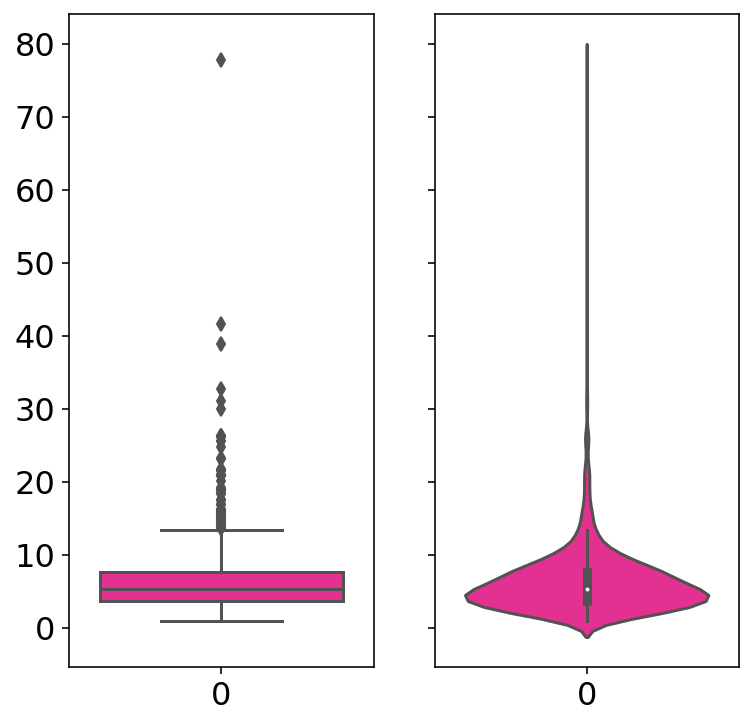

In [36]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 6))

sns.boxplot(data=df['wage'], ax=axes[0])
sns.violinplot(data=df['wage'], ax=axes[1])

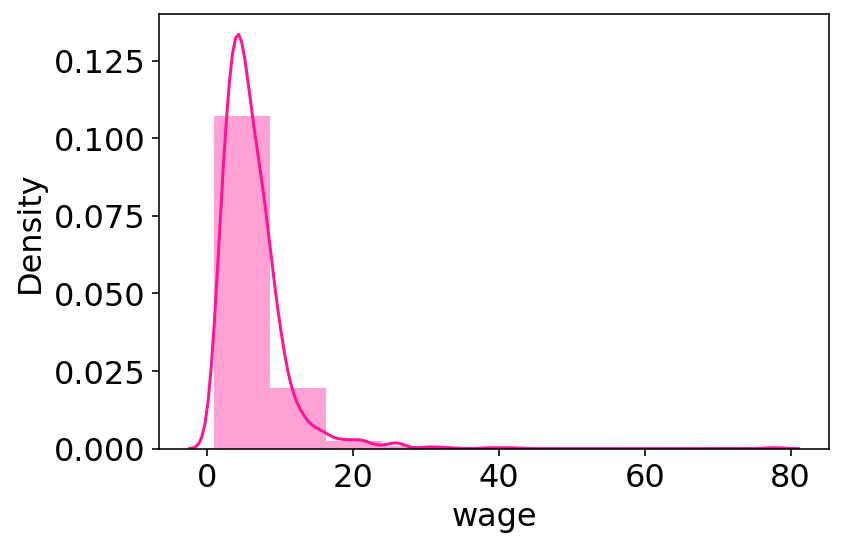

In [37]:
_ = sns.distplot(df['wage'], bins=10)

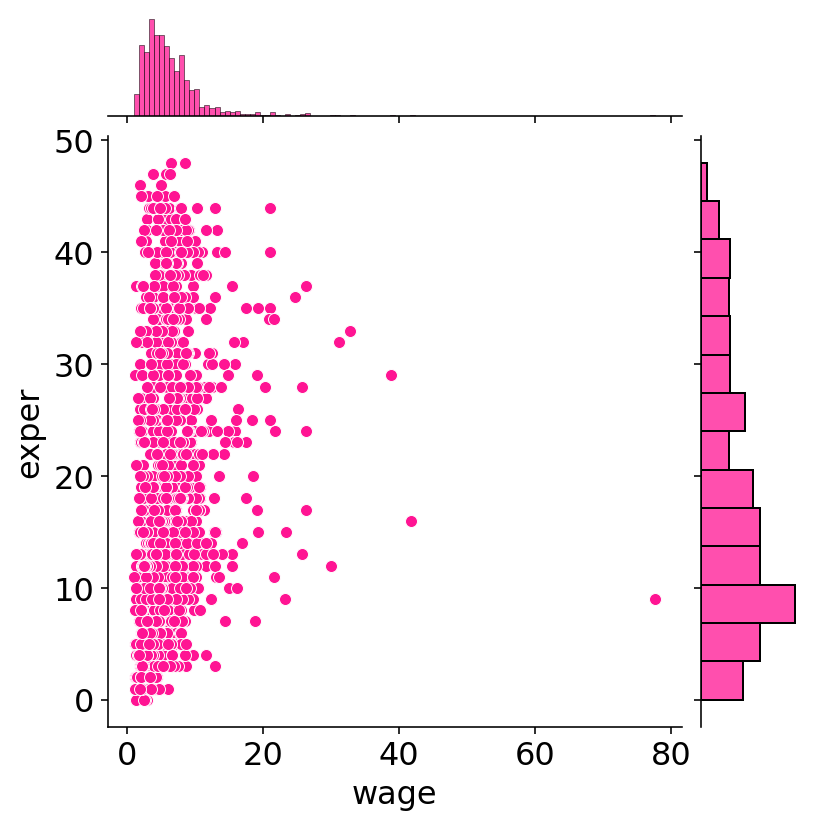

In [38]:
_ = sns.jointplot(x='wage', y='exper', data=df, kind='scatter')

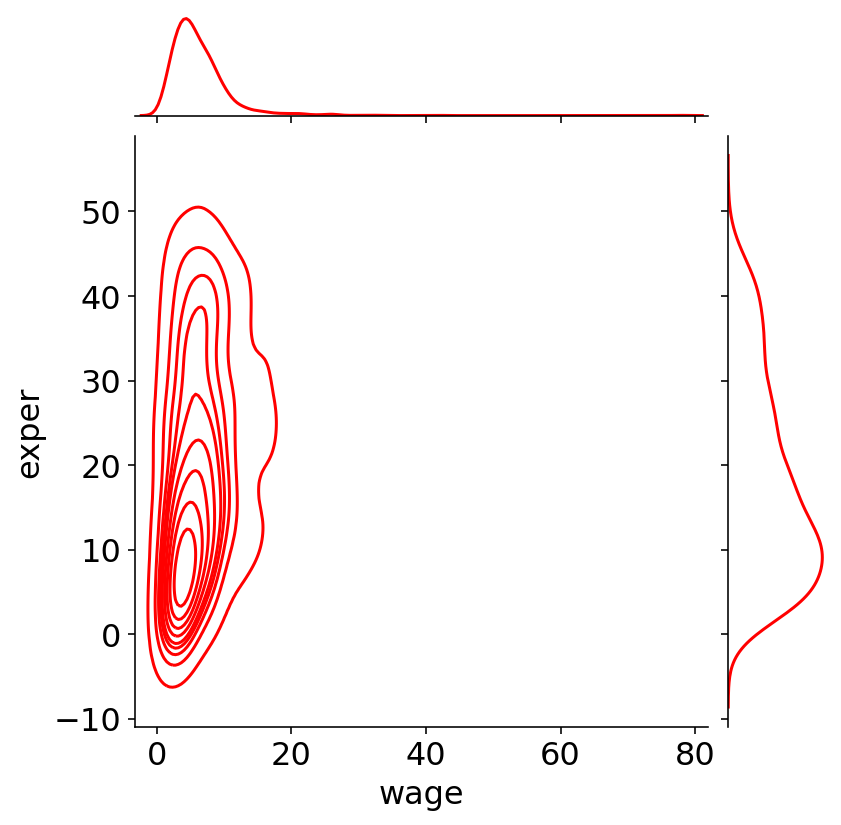

In [39]:
_ = sns.jointplot(x='wage', y='exper', data=df, kind="kde", color="r")

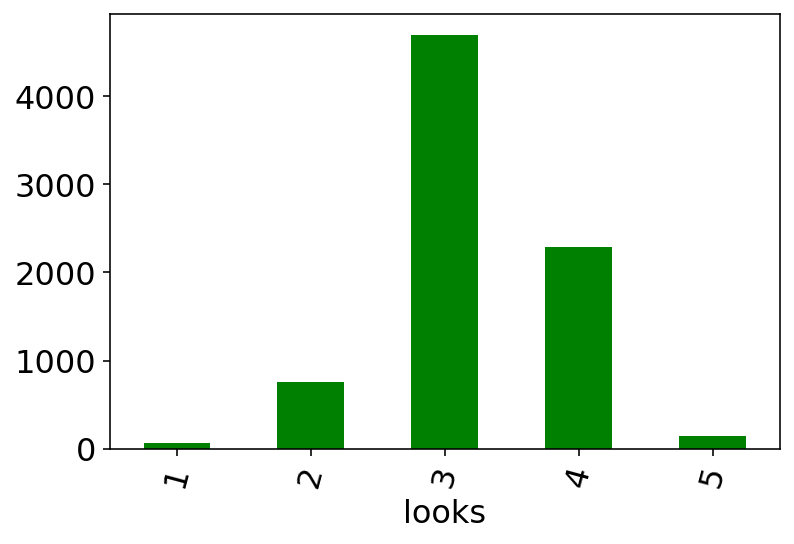

In [40]:
df.groupby('looks').wage.sum().plot(
    kind='bar', rot=75, color='#008000'
)

plt.show()

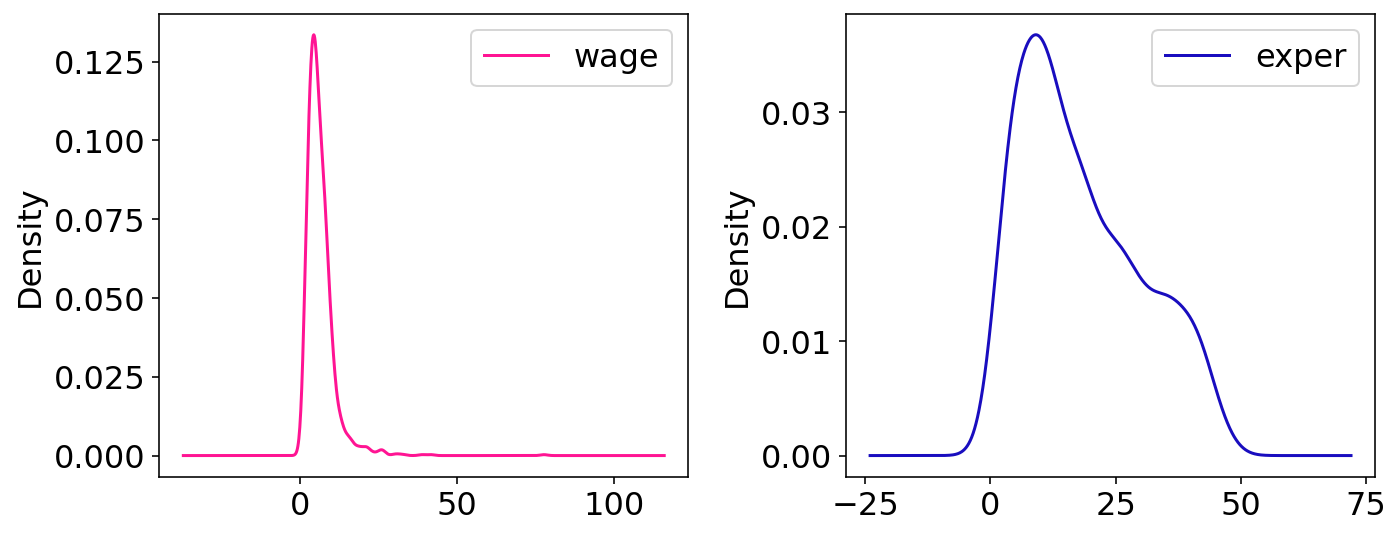

In [41]:
df[['wage', 'exper']].plot(
    kind='density',
    subplots=True,
    layout=(1, 2),
    sharex=False,
    figsize=(10, 4)
)

plt.tight_layout()